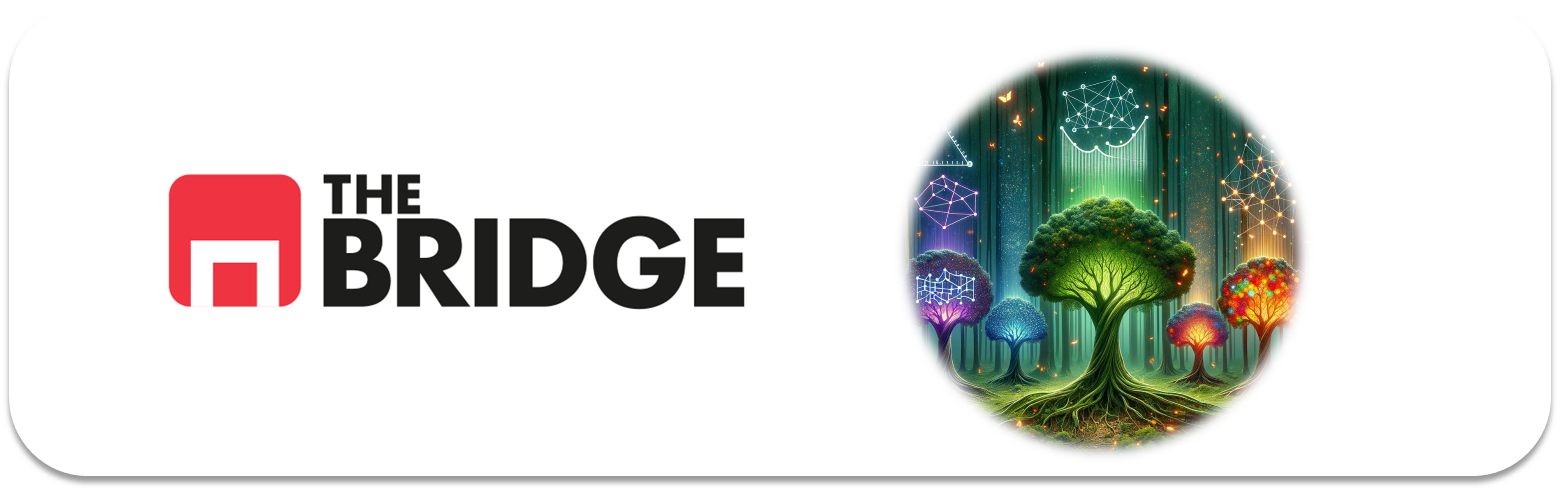

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [3]:
import bootcampviztools as bt
import pandas as pd


In [4]:
df = pd.read_csv(url, header = None, names = names)

In [5]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

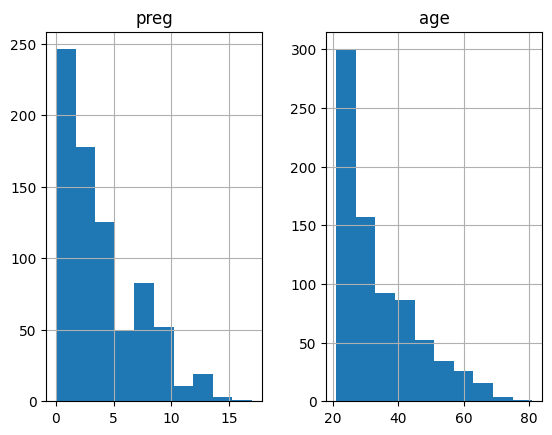

In [7]:
df[["preg","age"]].hist()

In [8]:
df.preg.value_counts()

preg
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

*Preg puede ser numérica o categórica, la analizaré de las dos formas contra el target*

In [9]:
target = "class"

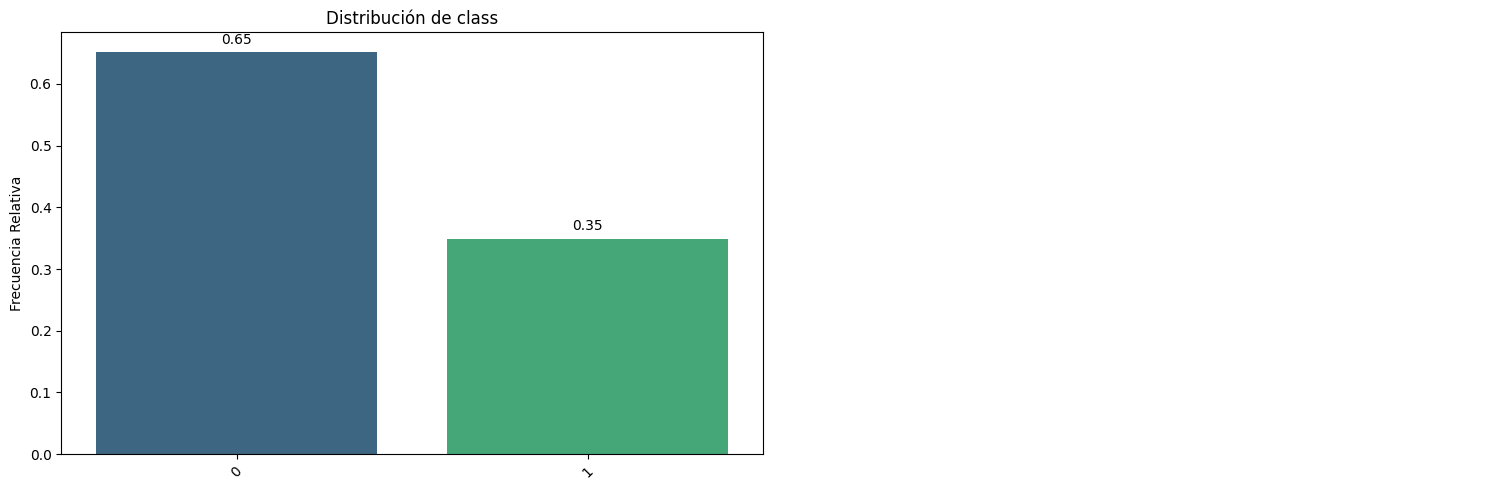

In [10]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores= True, relativa= True)

*Ligeramente desbalanceado, no haré nada en especial, salvo tocar el hiperparámetro correspondiente al peso de las clases*

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

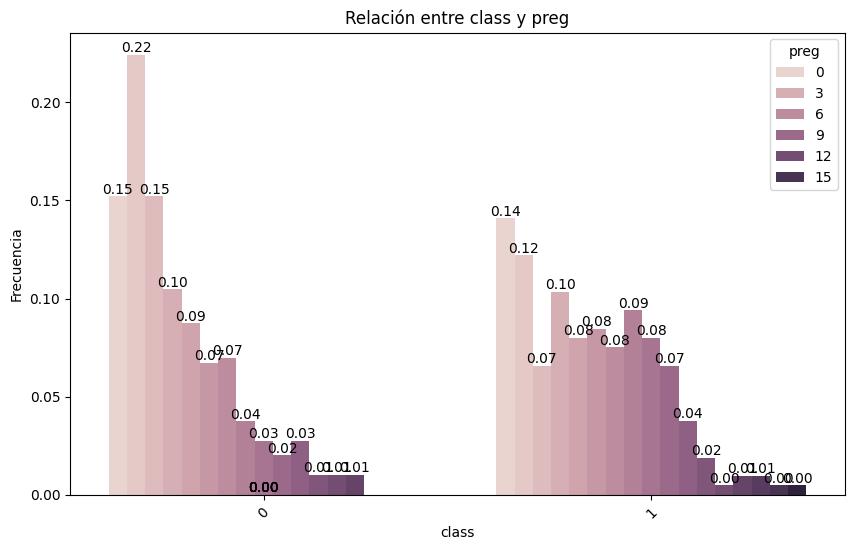

In [12]:
bt.plot_categorical_relationship_fin(train_set, target, "preg",relative_freq= True, show_values= True)

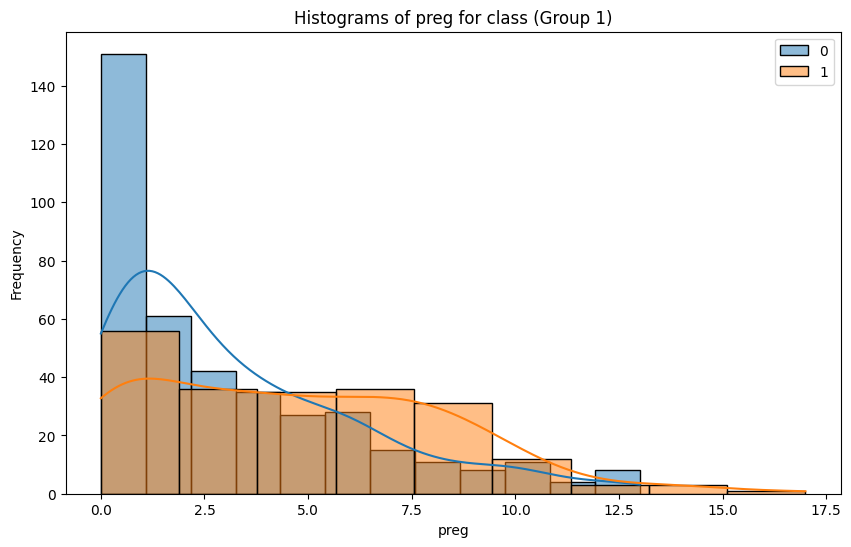

In [13]:
bt.plot_grouped_histograms(train_set, cat_col= target, num_col= "preg", group_size= 3)

In [14]:
features_num = train_set.columns.to_list()
features_num.remove(target)

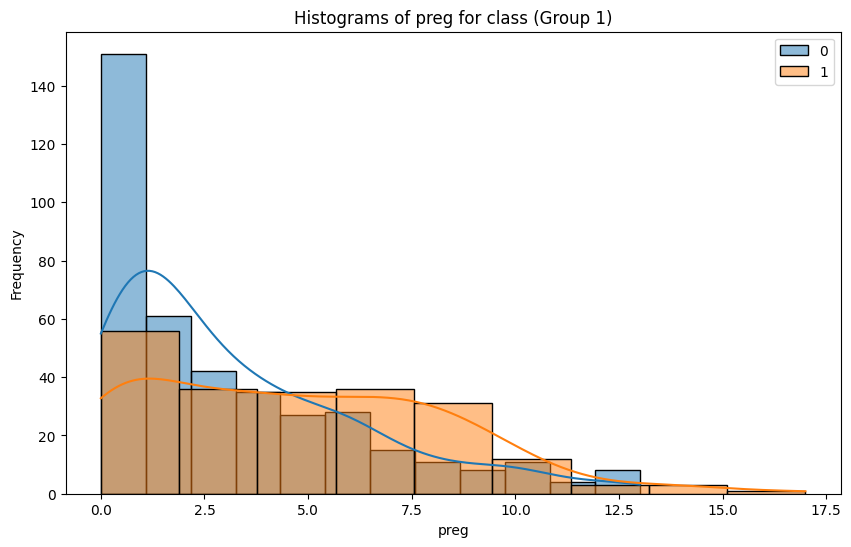

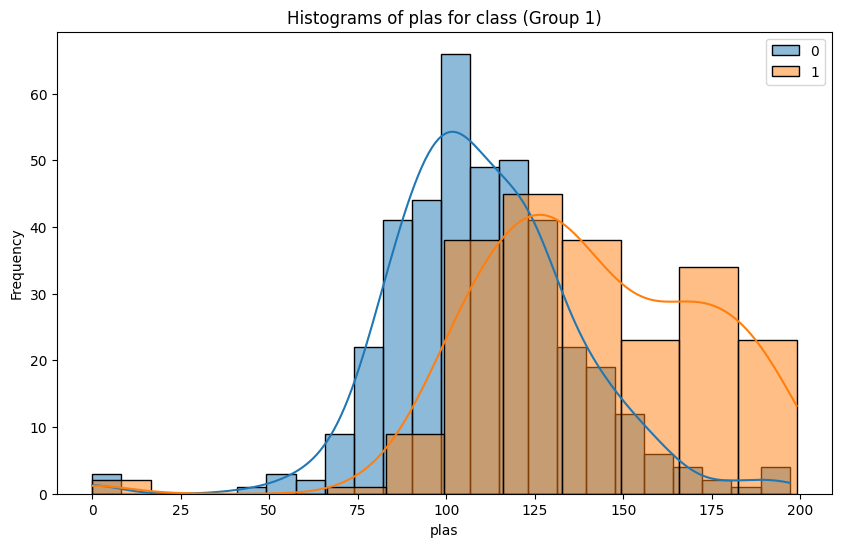

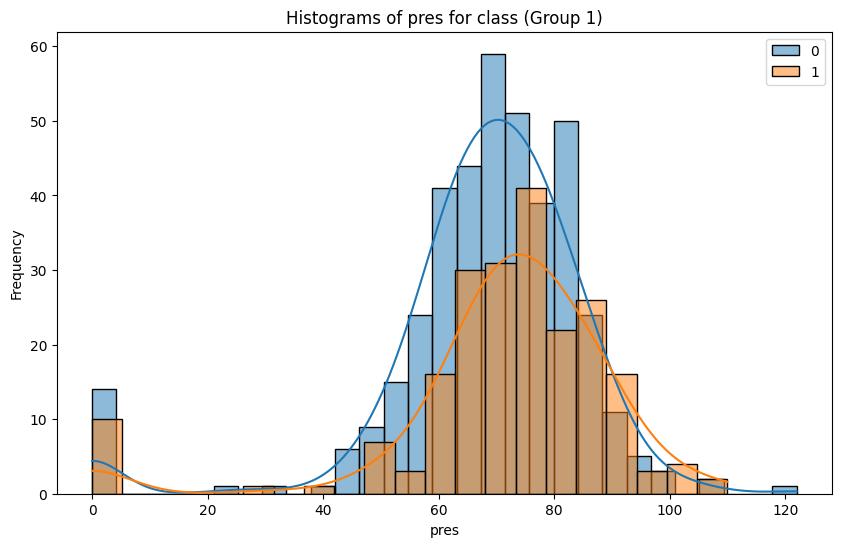

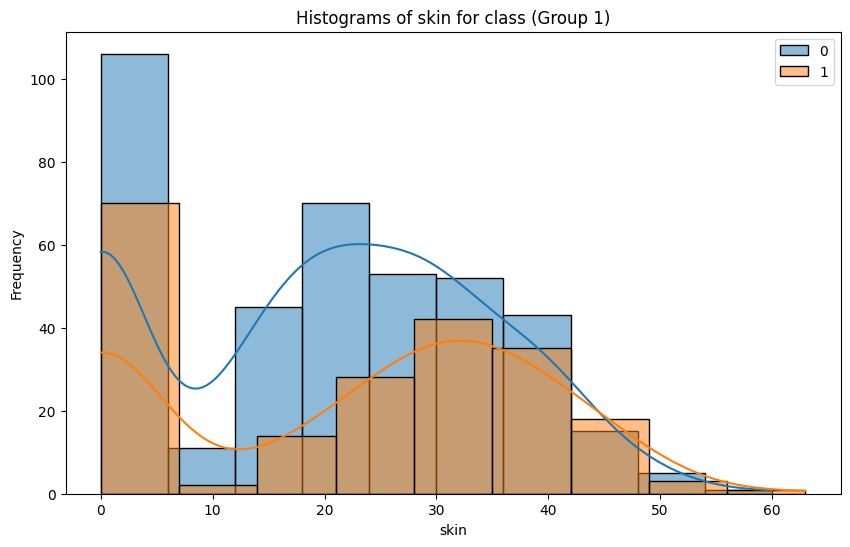

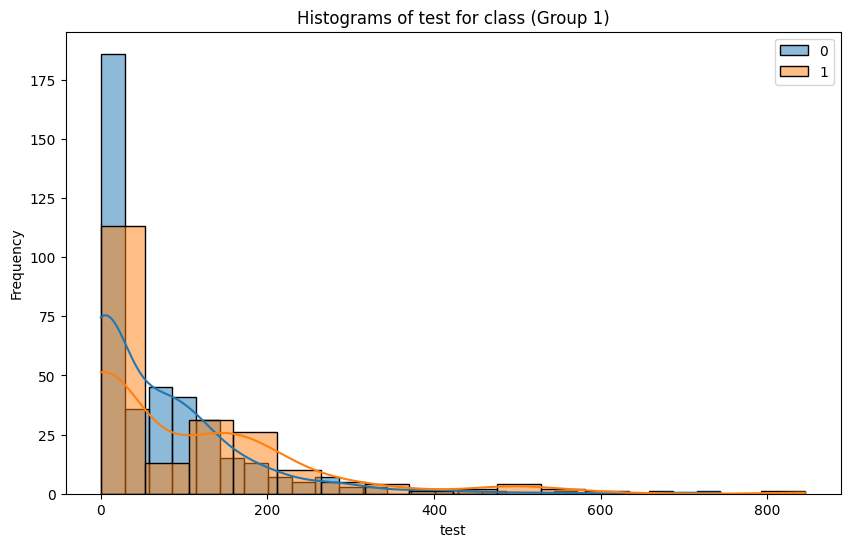

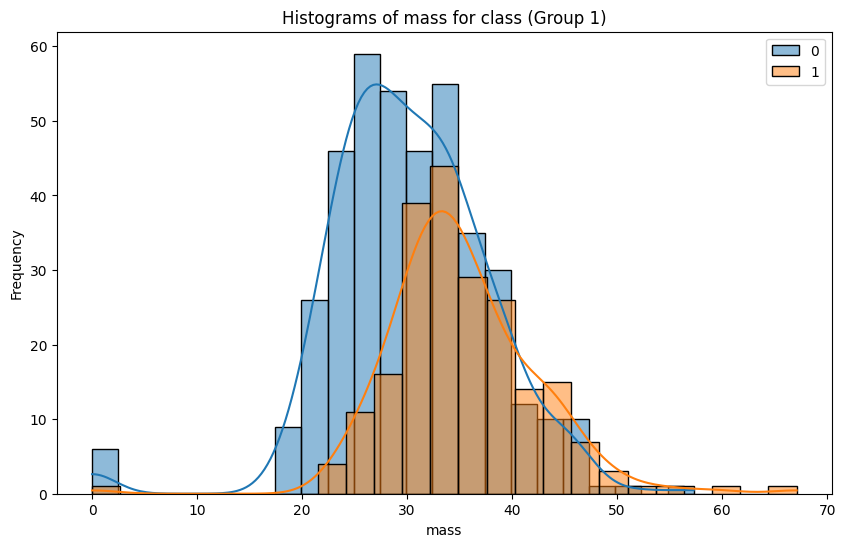

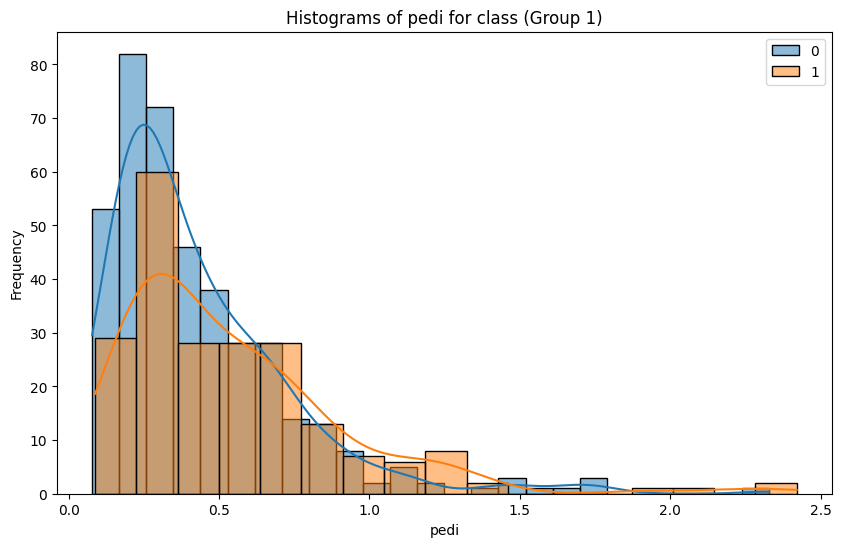

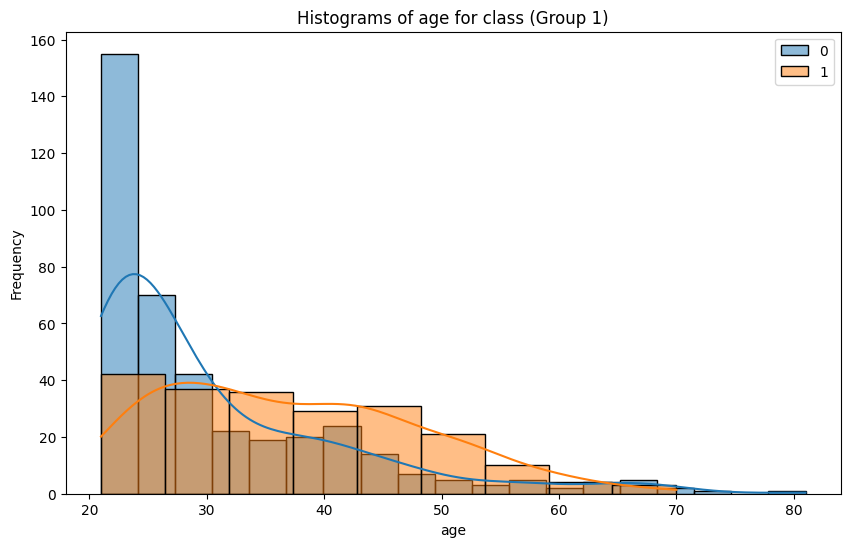

In [15]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 3)

*Vamos a considerar todas aunque esperamos que age,plas y preg sean las más predictoras (lo comprobaremos con el feature_importance de RandomForest) y mass puede que también, fíjate en el desplazamiento de las distribuciones de 0 respecto a 1*

In [16]:
X_train = train_set[features_num]
y_train = train_set[target]
X_test = test_set[features_num]
y_test = test_set[target]

In [17]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

base_clf = RandomForestClassifier(max_depth = 5, random_state= 42)


In [18]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print("Recall medio:", np.mean(cross_val_score(base_clf, X_train, y_train, cv = 5, scoring= "balanced_accuracy")))
base_clf.fit(X_train, y_train) # Para el feature Importance

Recall medio: 0.7161389504122063


RandomForestClassifier(max_depth=5, random_state=42)

In [19]:
print(classification_report(y_train, base_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       401
           1       0.89      0.69      0.78       213

    accuracy                           0.86       614
   macro avg       0.87      0.82      0.84       614
weighted avg       0.87      0.86      0.86       614



In [20]:
pd.DataFrame({"features": base_clf.feature_names_in_, "importance": base_clf.feature_importances_}).sort_values("importance",ascending = False)

,features,importance
1,plas,0.342675
5,mass,0.181538
7,age,0.160411
6,pedi,0.086599
4,test,0.068941
0,preg,0.060014
2,pres,0.053263
3,skin,0.046559


In [21]:
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth= 5, verbose = -100)

for nombre,modelo in zip(["Random Forest","XGboost","LightGBM"],[base_clf, xgb_clf, lgb_clf]):
    print(f"Para {nombre}:", end = " ")
    print(np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy")))
    

Para Random Forest: 0.7161389504122063
Para XGboost: 0.728478425823387
Para LightGBM: 0.7266535416923015


*Seleccionamos XGBoost y lo optimizamos, si tienes tiempo es mejor optimizar todos y comparar el mejor modelo de cada uno (ojo usando el best_score del Grid o del RandomizeSearch que ya lleva su cross_validation)*

In [22]:
### XGBoost

param_grid = {
    "n_estimators": [100,200,400],
    "eta": [0.1,0.3,0.6,1],
    "max_depth": [1,6,10,None],
    "min_child_weight": [1,10,20,100],
    "scale_pos_weight": [len(train_set[train_set[target] == 0])/len(train_set[target] == 0),1],
    "colsample_bytree": [0.5,1]
}

xgb_clf = XGBClassifier()

xgb_grid = GridSearchCV(xgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 1],
                         'eta': [0.1, 0.3, 0.6, 1],
                         'max_depth': [1, 6, 10, None],
                         'min_child_weight': [1, 10, 20, 100],
                         'n_estimators': [100, 200, 400],
                         'scale_pos_weight': [0.6530944625407166, 1]},
             scoring='balanced_accuracy')

In [23]:
#xgb_best = xgb_grid.best_estimator_
xgb_clf = XGBClassifier(max_depth = 5,scale_pos_weight = len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]))
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
print(classification_report(y_test, xgb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        99
           1       0.60      0.71      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



*Dejo en las siguientes celdas dos grids posibles para tunear los hiperparámetros de RandomForest y LightGBM*

In [26]:
### RandomForest, tarda en entrenar 7-8 horas

param_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [1,5,10,None],
    "min_samples_leaf": [1,10,20,100],
    "class_weight": ["balanced",None],
    "max_features": ["sqrt","log2",None]
}

rf_clf = RandomForestClassifier()

rf_grid = GridSearchCV(base_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

rf_grid.fit(X_train,y_train)



GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [1, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200, 400]},
             scoring='balanced_accuracy')

Probamos un XGBoost, un LightGBM y un Catboost con hiperparámetros para que entrenen muy rápido.

In [41]:
### XGBClassifier
# tarda en entrenar 4 min 30 s

param_grid = {
    "n_estimators": [100,200,400],
    "learning_rate": [0.1,0.3,0.6,1],
    "max_depth": [1,6,10,None],
    "min_data_in_leaf": [1,10,20,100],
    #"class_weight":["balanced",None],
    "max_bin": [40,80,100]
}

xgb_clf = XGBClassifier(verbosity= 0, scale_pos_weight = len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]) )

xgb_grid = GridSearchCV(xgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 1],
                         'max_bin': [40, 80, 100],
                         'max_depth': [1, 6, 10, None],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200, 400]},
             scoring='balanced_accuracy')

In [42]:
print(classification_report(y_test, xgb_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        99
           1       0.59      0.75      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.74      0.72      0.73       154



In [27]:
### XGBClassifier que imita a un light gradient boosting machine
# tarda en entrenar 4 min 30 s

param_grid = {
    "n_estimators": [100,200,400],
    "learning_rate": [0.1,0.3,0.6,1],
    "max_depth": [1,6,10,None],
    "min_data_in_leaf": [1,10,20,100],
    #"class_weight":["balanced",None],
    "max_bin": [40,80,100]
}

xgb_clf = XGBClassifier(verbosity= 0, tree_method = "hist", gpu = "gpu_hist", scale_pos_weight = len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]) )

xgb_grid = GridSearchCV(xgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu='gpu_hist', grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 1],
                         'max_bin': [40, 80, 100],
                         'max_depth': [1, 6, 10, None],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200, 400]},
             scoring='balanced_accuracy')

In [28]:
print(classification_report(y_test, xgb_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        99
           1       0.59      0.75      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.74      0.72      0.73       154



In [29]:
### LGBMClassifier
# tarda en entrenar 4 min 30 s

param_grid = {
    "n_estimators": [100,200,400],
    "learning_rate": [0.1,0.3,0.6,1],
    "max_depth": [1,6,10,None],
    "min_data_in_leaf": [1,10,20,100],
    "max_bin": [40,80,100]
}

lgbm_clf = LGBMClassifier(verbosity= 0,  device_type = "gpu", scale_pos_weight = len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]) )

lgbm_grid = GridSearchCV(xgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

lgbm_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu='gpu_hist', grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 1],
                         'max_bin': [40, 80, 100],
                         'max_depth': [1, 6, 10, None],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200, 400]},
             scoring='balanced_accuracy')

In [30]:
print(classification_report(y_test, xgb_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        99
           1       0.59      0.75      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.74      0.72      0.73       154



In [31]:
### Catboost
from catboost import CatBoostClassifier


In [43]:
# en hiperparámetros task_type="GPU" si tuviese CUDA
# tarda en entrenar 30 min
'''
param_grid = {
    "n_estimators": [100,200,400],
    "learning_rate": [0.1,0.3,0.6,1],
    "max_depth": [1,6,10,None],
    "min_data_in_leaf": [1,10,20,100],
    "max_bin": [40,80,100]
}
'''

catboost_clf = CatBoostClassifier(random_state= 42, verbose = False,  scale_pos_weight = len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]) )

catboost_grid = GridSearchCV(catboost_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

catboost_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001B134695C40>,
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 1],
                         'max_bin': [40, 80, 100],
                         'max_depth': [1, 6, 10, None],
                         'min_data_in_leaf': [1, 10, 20, 100],
                         'n_estimators': [100, 200, 400]},
             scoring='balanced_accuracy')

In [44]:
print(classification_report(y_test, xgb_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        99
           1       0.59      0.75      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.74      0.72      0.73       154

